In [10]:
from src.dist import BumpOnTail1D

dist = BumpOnTail1D(n_samples = 40000, L = 5)

In [11]:
x_init = dist.x_init
v_init = dist.v_init

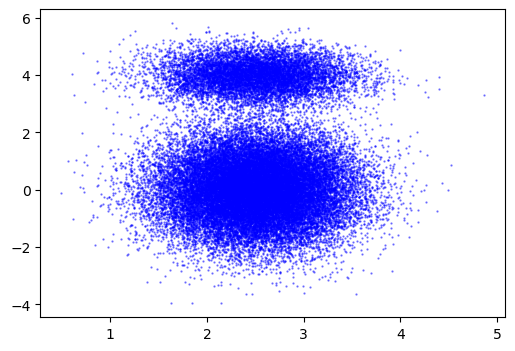

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6,4))
plt.scatter(x_init, v_init, s=0.4, color="blue", alpha=0.5)

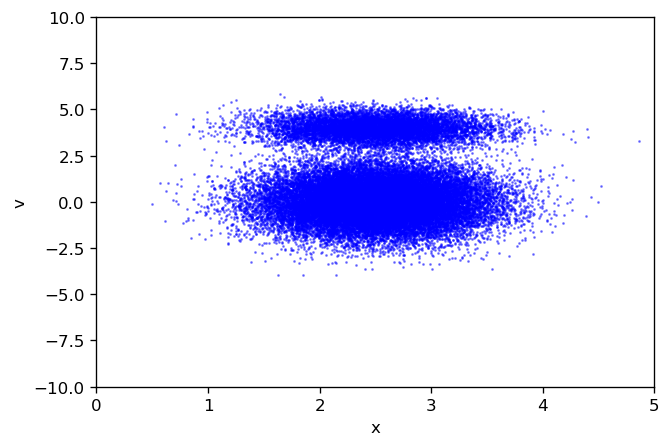

In [15]:
import numpy as np
import matplotlib.animation as animation
from matplotlib.pyplot import Axes

t_list = np.linspace(0,10,1000)
x_list = []
v_list = []

for t in t_list:
    x,v = dist.compute_trajectory(t)
    
    x_list.append(x)
    v_list.append(v)
    
fig, ax = plt.subplots(1,1,figsize = (6,4), facecolor = 'white', dpi=120)

def _plot(idx : int, ax:Axes):
    ax.cla()

    pos = x_list[idx]
    vel = v_list[idx]

    ax.scatter(pos, vel, s=0.4, color="blue", alpha=0.5)
    ax.set_xlabel("x")
    ax.set_ylabel("v")
    ax.axis([0, 5, -10.0, 10.0])

replay = lambda idx : _plot(idx, ax)
idx_max = len(x_list)
indices = [i for i in range(idx_max)]
ani = animation.FuncAnimation(fig, replay, frames = indices)
writergif = animation.PillowWriter(fps = 8, bitrate = False)
ani.save("./result/bumpontail.gif", writergif)

/home/jk9075/miniconda3/envs/research-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PIC simulation process: 100%|██████████| 50/50 [00:00<00:00, 110.79it/s]


# Simputation process end


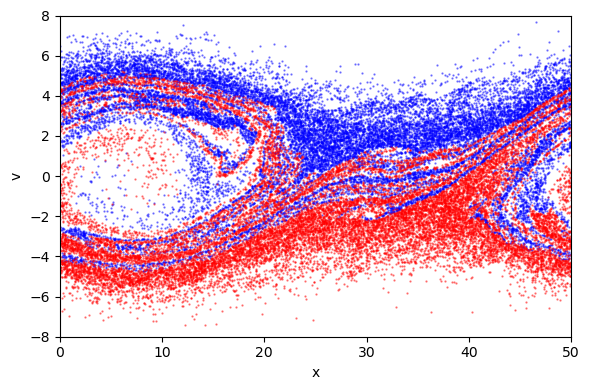

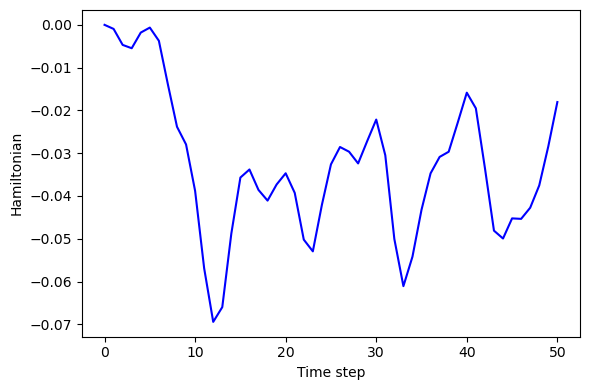

In [1]:
from src.PIC1D import PICsolver

solver = PICsolver(
    N = 40000,
    N_mesh=400,
    method = "leapfrog",
    n0 = 1.0,
    L = 50,
    dt = 1.0,
    tmin = 0.0,
    tmax = 50.0,
    gamma = 1.0,
    vth = 1.0,
    vb = 3.0,
    A = 0.1,
    use_animation=False,
    plot_freq=10,  
    save_dir = None
)
    
_,_,E_leapfrog = solver.solve()

PIC simulation process: 100%|██████████| 50/50 [00:00<00:00, 128.04it/s]


# Simputation process end


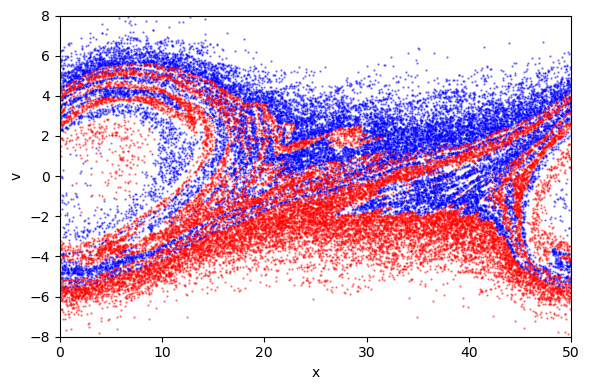

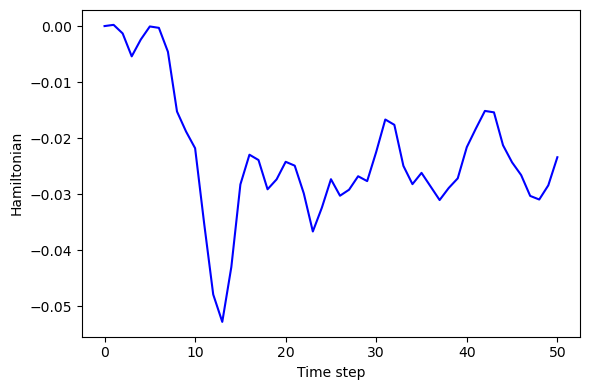

In [2]:
solver = PICsolver(
    N=40000,
    N_mesh=400,
    method="midpoint",
    n0=1.0,
    L=50,
    dt=1.0,
    tmin=0.0,
    tmax=50.0,
    gamma=1.0,
    vth=1.0,
    vb=3.0,
    A=0.1,
    use_animation=False,
    plot_freq=10,
    save_dir=None,
)

_, _, E_midpoint = solver.solve()

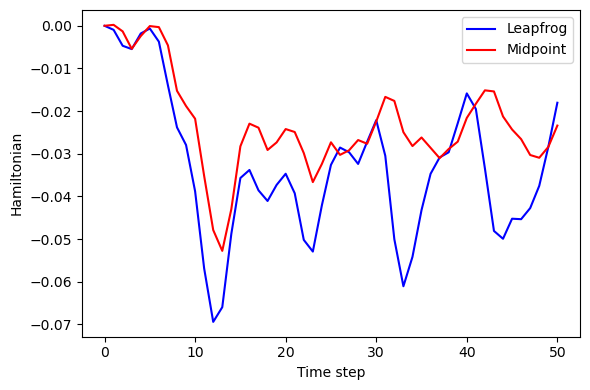

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (6,4))
plt.plot(np.arange(len(E_leapfrog)), E_leapfrog, 'b', label = "Leapfrog")
plt.plot(np.arange(len(E_midpoint)), E_midpoint, "r", label = "Midpoint")
plt.xlabel("Time step")
plt.ylabel("Hamiltonian")
plt.legend(loc = "upper right")
plt.tight_layout()
plt.savefig("./result/hamiltonian_comparsion.png")